In [423]:
#salgado martinez yuren joshua
#19091431
import pandas as pd
df = pd.read_csv('boston_train.csv',sep=',',header=0)
df.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,22
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,35
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33


In [424]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [425]:
df = df.dropna()
df.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,22
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,35
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33


In [426]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [427]:
(df == '?').any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD         True
TAX         True
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [428]:
import numpy as np
df = df.replace('?', np.nan)

for col in df.columns:
    df[col] = df[col].fillna(df[col].median())

In [429]:
(df == '?').any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

<Axes: >

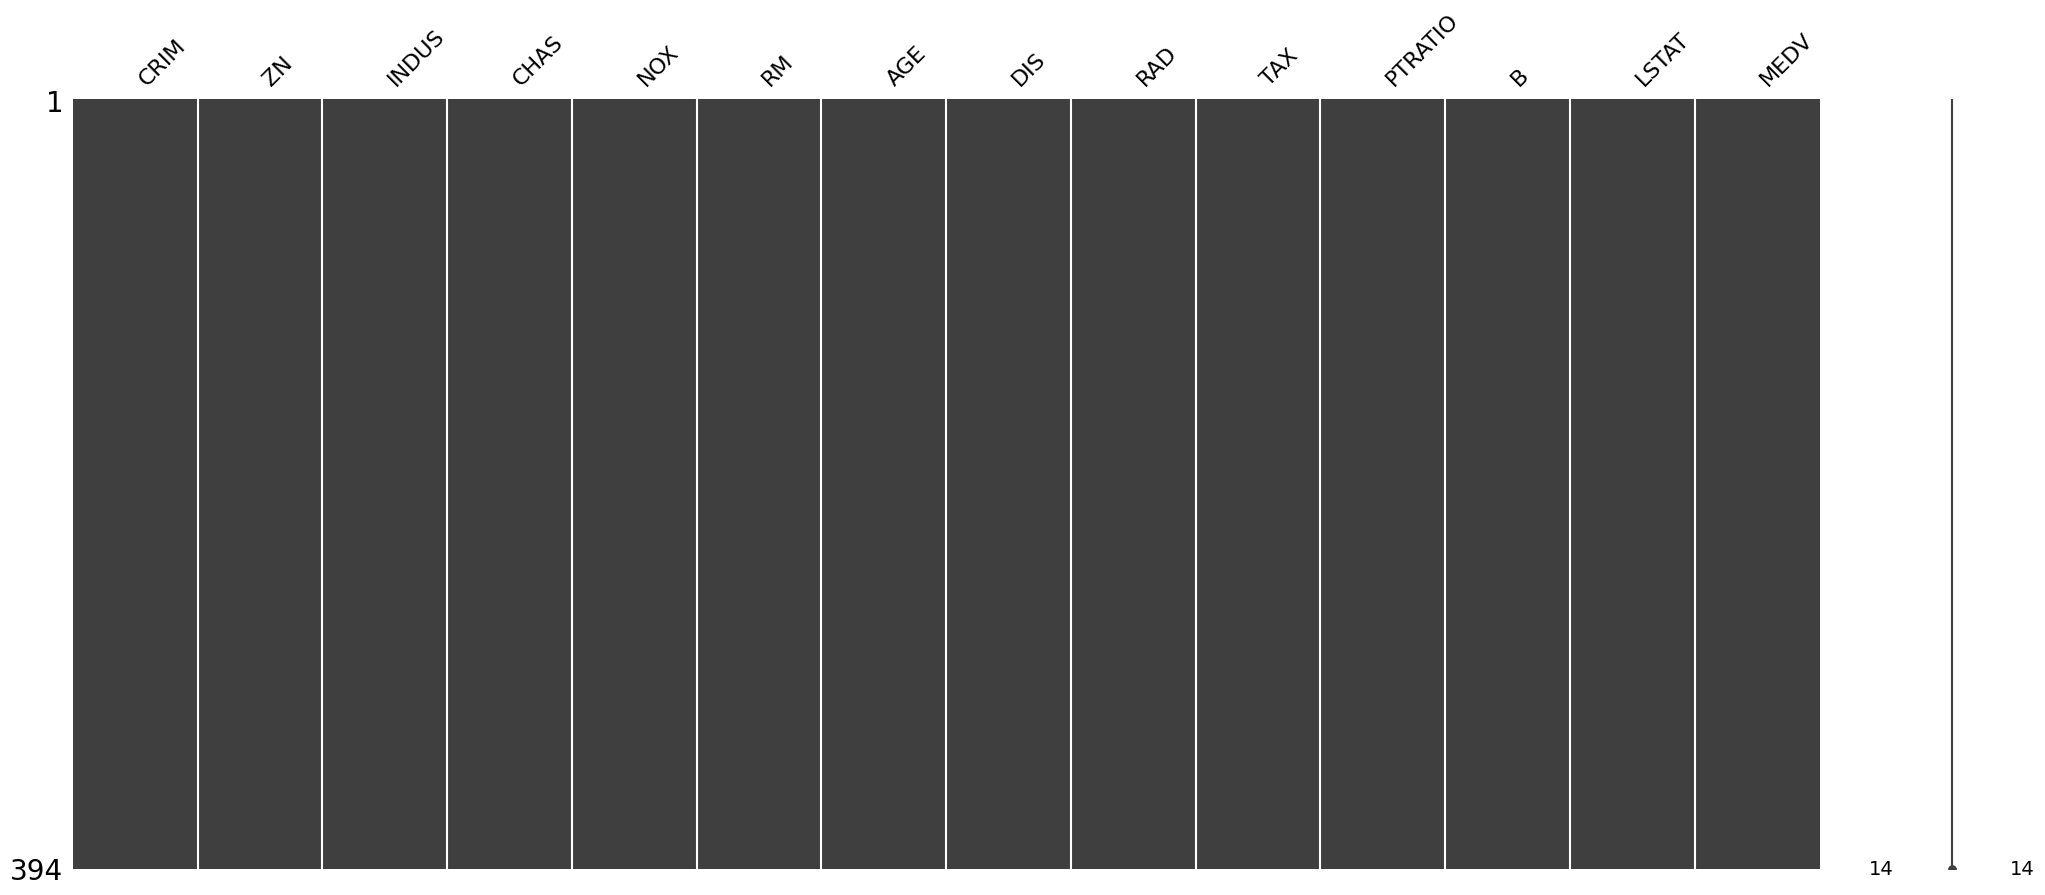

In [430]:
import missingno as msno
msno.matrix(df)

In [431]:
features = ['CRIM', 'ZN', 'INDUS', 'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO', 'B', 'LSTAT']
label = 'MEDV'

In [432]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [433]:
le = LabelEncoder()
y = le.fit_transform(df[label])
y

array([19, 17, 30, 28, 24, 22, 12, 10, 14, 17, 15, 15, 18, 13, 15, 13,  9,
       15, 10, 10, 11,  9, 12, 10, 13, 16,  8, 10,  8,  8,  9, 16, 20, 26,
       30, 22, 20, 16, 14, 15,  9, 14, 15, 20, 14, 30, 20, 27, 18, 15, 14,
       11, 17, 20, 28, 19, 14, 17, 12, 16, 19, 17, 18, 16, 15, 16, 16, 23,
       19, 20, 18, 19, 22, 18, 19, 24, 18, 17, 20, 16, 23, 16, 34, 38, 28,
       23, 22, 14, 15, 15, 15, 15, 15, 14, 17, 18, 14, 14, 14, 14, 17, 15,
       16, 14, 16, 11, 13,  9, 14, 15, 18, 11, 13, 12, 12, 13,  9,  9,  8,
       11,  7,  9, 10, 15, 14, 12,  8, 19, 18, 22, 42, 42, 18, 20, 42, 19,
       17, 12, 14, 18, 18, 24, 18, 25, 32, 35, 31, 33, 21, 25, 27, 25, 30,
       32, 24, 42, 25, 30, 30, 28, 19, 36, 41, 42, 19, 15, 14, 17, 23, 19,
       18, 24, 17, 22, 17, 23, 25, 39, 42, 27, 19, 27, 36, 24, 19, 27, 18,
       17, 19, 13, 19, 16, 20, 21, 19, 20, 25, 37, 16, 38, 42, 31, 25, 29,
       37, 26, 32, 18, 42, 38, 16, 16, 19, 30, 27, 27, 28, 24, 30, 39, 40,
       42, 27, 17, 18, 20

In [434]:
xtrain, xtest, ytrain, ytest = train_test_split(df[features], y, test_size=0.2, random_state=0)

In [435]:
print(xtrain.shape)
print(xtest.shape)
print(len(ytrain))
print(len(ytest))

(315, 12)
(79, 12)
315
79


In [436]:
from sklearn.linear_model import LinearRegression


In [437]:
svm = LinearRegression()
modelo = svm.fit(xtrain, ytrain)
prediccion = modelo.predict(xtest)

In [438]:
prediccion_lista = prediccion.tolist()
ytest_lista = ytest.tolist()

i=0
for pred in prediccion_lista:
    print(round(pred), '-->', ytest[i])

i += 1

11 --> 12
15 --> 12
22 --> 12
36 --> 12
12 --> 12
14 --> 12
24 --> 12
14 --> 12
23 --> 12
8 --> 12
19 --> 12
10 --> 12
18 --> 12
21 --> 12
7 --> 12
27 --> 12
23 --> 12
25 --> 12
21 --> 12
17 --> 12
14 --> 12
26 --> 12
16 --> 12
14 --> 12
14 --> 12
18 --> 12
12 --> 12
4 --> 12
19 --> 12
19 --> 12
4 --> 12
18 --> 12
14 --> 12
22 --> 12
11 --> 12
9 --> 12
18 --> 12
13 --> 12
18 --> 12
9 --> 12
20 --> 12
8 --> 12
24 --> 12
17 --> 12
28 --> 12
10 --> 12
15 --> 12
13 --> 12
8 --> 12
10 --> 12
15 --> 12
14 --> 12
8 --> 12
27 --> 12
2 --> 12
12 --> 12
14 --> 12
14 --> 12
16 --> 12
21 --> 12
13 --> 12
13 --> 12
17 --> 12
15 --> 12
16 --> 12
33 --> 12
15 --> 12
25 --> 12
11 --> 12
25 --> 12
17 --> 12
7 --> 12
21 --> 12
11 --> 12
13 --> 12
11 --> 12
18 --> 12
25 --> 12
4 --> 12


In [439]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [440]:
print('score: ', modelo.score(xtest, ytest))
print('mean_squared_error', mean_squared_error(prediccion, ytest))

score:  0.5968860623513941
mean_squared_error 25.73211711844291


In [441]:
from sklearn.linear_model import Ridge

In [442]:
svm = Ridge()
modelo = svm.fit(xtrain, ytrain)
prediccion = modelo.predict(xtest)

In [443]:
print('score: ', modelo.score(xtest, ytest))
print('mean_squared_error', mean_squared_error(prediccion, ytest))

score:  0.60243958405782
mean_squared_error 25.377617167875243


In [444]:
from sklearn.linear_model import LogisticRegression
svm = LogisticRegression(max_iter=1000)
modelo = svm.fit(xtrain, ytrain)
prediccion = modelo.predict(xtest)

/home/xexeyt/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [445]:
print('score: ', modelo.score(xtest, ytest))

print('mean_squared_error', mean_squared_error(prediccion, ytest))

score:  0.10126582278481013
mean_squared_error 27.189873417721518


In [446]:
from sklearn.linear_model import Lasso
svm = Lasso()
modelo = svm.fit(xtrain, ytrain)
prediccion = modelo.predict(xtest)

In [447]:
print('score: ', modelo.score(xtest, ytest))
print('mean_squared_error', mean_squared_error(prediccion, ytest))

score:  0.6397845517170053
mean_squared_error 22.993762401662


In [448]:
from sklearn.linear_model import ElasticNet
svm = ElasticNet()
modelo = svm.fit(xtrain, ytrain)
prediccion = modelo.predict(xtest)

In [449]:
print('score: ', modelo.score(xtest, ytest))
print('mean_squared_error', mean_squared_error(prediccion, ytest))

score:  0.6486341861493865
mean_squared_error 22.428860500731098
